1.3.2 平均値を求める実装（メモリが膨大）

In [3]:
import numpy as np

np.random.seed(0)
rewards = []

for n in range(1,11):
    reward = np.random.rand()
    rewards.append(reward)
    Q = sum(rewards) / n
    print(Q)

0.5488135039273248
0.6320014351498722
0.6222554154571294
0.6029123573420713
0.567060845741438
0.5801997236289743
0.5598265075766483
0.6013198192273272
0.6415801460355164
0.6157662833145425


1.3.2 平均値を求める実装（改善版:一つ前の数値を参照して求める）

In [4]:
Q = 0
for n in range(1, 11):
    reward = np.random.rand()
    Q = Q + (reward - Q) / n
    print(Q)

0.7917250380826646
0.6603099789177845
0.6295548396431672
0.7035652893055406
0.5770594430840099
0.49540441918693173
0.4275207017945595
0.4781580947637318
0.5114912787844116
0.5473433657306523


1.4.1 スロットマシンの実装

In [5]:
class Bandit:
    def __init__(self, arms=10): # arms: スロットマシーンの数
        self.rates = np.random.rand(arms) # それぞれに勝率をランダム設定(リスト)

    def play(self, arm):
        rate = self.rates[arm] # arm番目のスロットの勝率
        if rate > np.random.rand(): # 勝率が乱数より大きければ
            return 1
        else:
            return 0

In [6]:
bandit = Bandit()

# 0番目のスロットを３回プレイ
for i in range(3):
    print(bandit.play(0))

1
1
1


1.4.2 エージェントの実装

スロットをプレイして平均値を更新

In [7]:
bandit = Bandit()
Q = 0

for n in range(1, 11):
    # reward = np.random.rand()
    reward = bandit.play(0) # 0番目のスロットをプレイ
    Q = Q + (reward - Q) / n # 平均値を更新
    print(Q)

1.0
0.5
0.33333333333333337
0.5
0.6
0.6666666666666666
0.7142857142857143
0.625
0.6666666666666666
0.6


１０個のスロットからランダム選択、それぞれの記録を保持

In [8]:
bandit = Bandit()
Qs = np.zeros(10) # 10個のスロットにおける平均値を格納するリスト
ns = np.zeros(10) # 10個のスロットにおけるプレイした回数を格納するリスト

for n in range(10):
    action = np.random.randint(0, 10) # 10個のスロットからランダムに選ぶ
    reward = bandit.play(action) # 選ばれたaction番目のスロットをプレイ

    ns[action] += 1 # action番目のスロットにおけるプレイした回数更新
    Qs[action] += (reward - Qs[action]) / ns[action] # action番目のスロットにおける平均値を更新
    print(Qs)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]


In [9]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    def get_action(self):
        if np.random.rand() < self.epsilon: # もし乱数がepsilonより低ければ、
            return np.random.randint(0, len(self.Qs)) # 探索に出る（ランダムでスロットを選ぶ）
        return np.argmax(self.Qs) # 基本的には一番成績の良いスロットを選ぶ

892


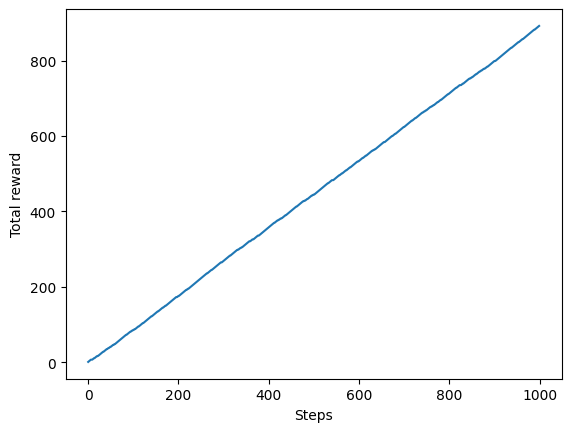

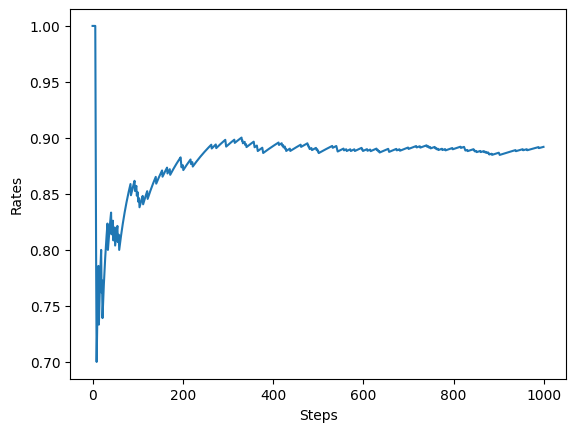

In [10]:
import matplotlib.pyplot as plt

steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)
total_reward = 0
total_rewards = [] # 図のプロットのため
rates = []

for step in range(steps):
    action = agent.get_action() # 1. エージェントの行動（１番成績の良いスロット選択かランダム選択）
    reward = bandit.play(action) # 2. 選んだスロットをプレイして報酬を得る
    agent.update(action, reward) # 3. 報酬から選んだスロットの平均値を更新（=学習）する
    total_reward += reward # 全スロットにおいて得た報酬合計

    total_rewards.append(total_reward)
    rates.append(total_reward / (step+1)) # 勝率

print(total_reward)

plt.ylabel('Total reward')
plt.xlabel('Steps')
plt.plot(total_rewards)
plt.show()

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(rates)
plt.show()

[[0.         0.5        0.33333333 ... 0.85871743 0.85885886 0.859     ]
 [1.         1.         1.         ... 0.85170341 0.85185185 0.852     ]
 [0.         0.         0.         ... 0.70941884 0.70870871 0.709     ]
 ...
 [0.         0.5        0.66666667 ... 0.82164329 0.82182182 0.821     ]
 [0.         0.         0.33333333 ... 0.72745491 0.72772773 0.727     ]
 [0.         0.         0.         ... 0.75350701 0.75375375 0.754     ]]


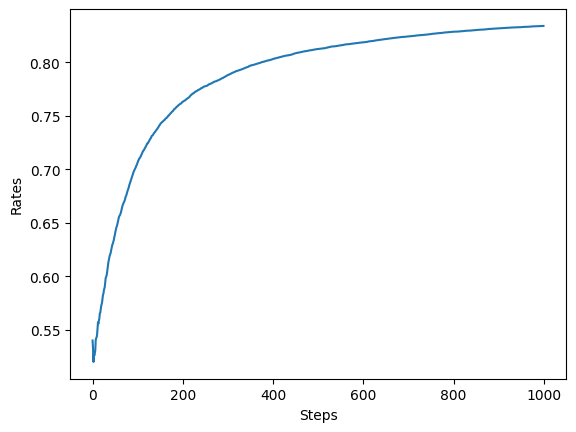

In [16]:
import numpy as np
import matplotlib.pyplot as plt
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # 200セット×1000試行

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []

    for step in range(steps):
        action = agent.get_action() # 1. エージェントの行動（１番成績の良いスロット選択かランダム選択）
        reward = bandit.play(action) # 2. 選んだスロットをプレイして報酬を得る
        agent.update(action, reward) # 3. 報酬から選んだスロットの平均値を更新（=学習）する
        total_reward += reward # 全スロットにおいて得た報酬合計

        total_rewards.append(total_reward)
        rates.append(total_reward / (step+1)) # 勝率

    all_rates[run] = rates # セット毎の勝率を記録

avg_rates = np.average(all_rates, axis=0) # 勝率の平均

print(all_rates)

plt.ylabel('Rates')
plt.xlabel('Steps')
plt.plot(avg_rates)
plt.show()

1.5 非定常問題（スロットの勝率設定が試行ごとに変化）

In [18]:
class NotStatBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.rates = np.random.rand(arms)

    def play(self, arm):
        rate = self.rates[arm]
        self.rates += 0.1 * np.random.randn(self.arms) # ノイズを追加
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [19]:
class AlphaAgent:
    def __init__(self, epsilon, alpha, actions=10):
        self.epsilon = epsilon
        self.Qs = np.zeros(actions)
        self.alpha = alpha # 重み（過去のデータほど価値が低いようにする）

    def update(self, action, reward):
        self.Qs[action] += (reward - self.Qs[action]) * self.alpha # 重みを組み込んで平均値を更新

    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))
        return np.argmax(self.Qs)

4.1.2 反復方策評価

In [ ]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

# ベルマン方程式で一発でで真の価値関数（収益の期待値）を求めるのではなく、
# 試行を繰り返して価値関数を更新することで真の価値関数に近い数値を出す
for _ in range(100):
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2']) # L1を始点にした収益の期待値を更新
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2']) # L2を始点にした収益の期待値を更新
    V = new_V.copy() # 次更新する際における一つ前の期待値として保持
    print(V)


{'L1': 0.0, 'L2': 0.5}
{'L1': 0.22499999999999998, 'L2': 0.725}
{'L1': 0.42749999999999994, 'L2': 0.9274999999999999}
{'L1': 0.6097499999999999, 'L2': 1.10975}
{'L1': 0.7737750000000001, 'L2': 1.273775}
{'L1': 0.9213975000000001, 'L2': 1.4213975}
{'L1': 1.05425775, 'L2': 1.55425775}
{'L1': 1.1738319750000001, 'L2': 1.6738319750000001}
{'L1': 1.2814487775, 'L2': 1.7814487775}
{'L1': 1.3783038997500001, 'L2': 1.8783038997500001}
{'L1': 1.465473509775, 'L2': 1.965473509775}
{'L1': 1.5439261587975, 'L2': 2.0439261587975}
{'L1': 1.61453354291775, 'L2': 2.11453354291775}
{'L1': 1.6780801886259753, 'L2': 2.1780801886259753}
{'L1': 1.7352721697633777, 'L2': 2.2352721697633777}
{'L1': 1.78674495278704, 'L2': 2.28674495278704}
{'L1': 1.8330704575083359, 'L2': 2.333070457508336}
{'L1': 1.8747634117575023, 'L2': 2.3747634117575025}
{'L1': 1.912287070581752, 'L2': 2.412287070581752}
{'L1': 1.9460583635235769, 'L2': 2.446058363523577}
{'L1': 1.9764525271712192, 'L2': 2.476452527171219}
{'L1': 2.0038

In [ ]:
V = {'L1': 0.0, 'L2': 0.0}
new_V = V.copy()

cnt = 0
while True:
    new_V['L1'] = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    new_V['L2'] = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])

    delta = abs(new_V['L1'] - V['L1']) # 更新差の絶対値
    delta = max(delta, abs(new_V['L2'] - V['L2'])) # 更新差の最大値

    V = new_V.copy() # 次更新する際における一つ前の期待値として保持

    cnt += 1
    # もし閾値より更新量が小さければそこで更新終了
    if delta < 0.0001:
        print(V)
        print(cnt)
        break

{'L1': -2.249167525908671, 'L2': -2.749167525908671}
76


In [10]:
V = {'L1': 0.0, 'L2': 0.0}

cnt = 0
while True:
    t = 0.5 * (-1 + 0.9 * V['L1']) + 0.5 * (1 + 0.9 * V['L2'])
    delta = abs(t - V['L1'])
    V['L1'] = t

    t = 0.5 * (0 + 0.9 * V['L1']) + 0.5 * (-1 + 0.9 * V['L2'])
    delta = max(delta, abs(t - V['L2']))
    V['L2'] = t

    cnt += 1
    if delta < 0.0001:
        print(V)
        print(cnt)
        break


{'L1': -2.2493782177156936, 'L2': -2.7494201578106514}
60


In [ ]:
import numpy as np

class GridWorld:
    def __init__(self):
        self.action_space = [0, 1, 2, 3]
        self.action_meaning = {
            0: "UP",
            1: "DOWN",
            2: "LEFT",
            3: "RIGHT",
        }

        self.reward_map = np.array(
            [[0, 0, 0, 1.0],
             [0, None, 0, -1.0],
             [0, 0, 0, 0]]
        )
        self.goal_state = (0, 3)
        self.wall_state = (1, 1)
        self.start_state = (2, 0)
        self.agent_state = self.start_state

    @property # env.height()ではなくenv.heightで呼べる（インスタンスとして）
    def height(self):
        return len(self.reward_map)

    @property
    def width(self):
        return len(self.reward_map[0])

    @property
    def shape(self):
        return self.reward_map.shape

    def actions(self):
        return self.action_space

    def states(self):
        for h in range(self.height):
            for w in range(self.width):
                yield (h, w)

    def next_state(self, state, action):
        # 移動先の計算（壁や枠を無視）
        action_move_map = [(-1, 0), (1, 0), (0, -1), (0,1)] # どうmoveするかのコマンドリスト
        move = action_move_map[action] # action(0-3)でコマンドリストから一つmoveを選択
        next_state = (state[0] + move[0], state[1] + move[1]) # 現在座標からmove
        ny, nx = next_state # 現在座標を更新

        # 移動先が枠外か確認
        if nx < 0 or nx >= self.width or ny < 0 or ny >= self.height:
            next_state = state # 現在位置のまま
        # 移動先が壁なのかを確認
        elif next_state == self.wall_state:
            next_state =state # 現在位置のまま

        return next_state

    def reward(self, state, action, next_state):
        return self.reward_map[next_state]

In [12]:
env = GridWorld()

print(env.height)
print(env.width)
print(env.shape)

3
4
(3, 4)


In [15]:
for action in env.actions():
    print(action)

print('===')

for state in env.states():
    print(state)

0
1
2
3
===
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
